### 1. 시작하기

pass

### 2. 기본 명령어

In [2]:
print("fit a model with", 11, "variables")

fit a model with 11 variables


여러 개의 input을 받음.

In [3]:
print?

Docstring:
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword arguments:
file:  a file-like object (stream); defaults to the current sys.stdout.
sep:   string inserted between values, default a space.
end:   string appended after the last value, default a newline.
flush: whether to forcibly flush the stream.
Type:      builtin_function_or_method

In [4]:
3 + 5

8

In [5]:
"hello"+ " " + "world"

'hello world'

- 숫자 더하기 : 합 계산
- 문자열 더하기 : 문자열 연결

문자열은 시퀀스(sequence)의 한 유형이다.
- 여기서 시퀀스는 순서가 있는 목록을 의미함.
- 시퀀스의 가장 중요한 유형 : 리스트, 튜플, 문자열이다.

In [6]:
x = [3, 4, 5]
x

[3, 4, 5]

In [7]:
y = [4, 9, 7]
x + y

[3, 4, 5, 4, 9, 7]

- 리스트의 각 element끼리 더하려고 했지만 다른 결과가 나옴.
- 파이썬에서 리스트는 '임의'의 객체를 담고, 연결(concatenation) 연산을 이용해 덧셈을 함.
    - 파이썬이 범용 목적의 프로그램 언어이기 때문에

### 3. Numerical Python 소개

파이썬의 데이터 관련 특수 기능은 `numpy`, `pandas`와 같은 다른 패키지에서 나온다.

- 패키지 : 모듈을 모아 놓은 것 (기본 파이썬 배포판에는 반드시 포함될 필요가 없는 추가 모듈들의 모음)
    - `numpy` : numerical Python의 줄임말 

`numpy`에서 array는 숫자의 다차원 모음을 가리키는 generic 용어이다.

In [8]:
import numpy as np

x = np.array([3,4,5])
y = np.array([4,9,7])

In [9]:
x + y

array([ 7, 13, 12])

- 정상적으로 두 배열이 더해짐
    - 리스트와는 다르게 연결 연산을 하지 않고, 더하기 연산을 수행함.

In [10]:
# 2차원 배열
x = np.array([[1, 2], [3, 4]])
x

array([[1, 2],
       [3, 4]])

- numpy 배열 객체는 몇 가지 속성(attribute)를 가지고 있다.
    - 속성에 접근 : `x.attribute`(attribute에 원하는 속성으로 대체)

In [12]:
x.ndim # 2차원 배열

2

In [14]:
x.dtype # 32비트 정수형

dtype('int32')

In [16]:
np.array([[1,2], [3.0, 4]]).dtype # 64비트 실수형

dtype('float64')

In [21]:
# 함수와 관련된 도움말 확인
np.array?

Docstring:
array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
      like=None)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    ``__array__`` method returns an array, or any (nested) sequence.
    If object is a scalar, a 0-dimensional array containing object is
    returned.
dtype : data-type, optional
    The desired data-type for the array. If not given, NumPy will try to use
    a default ``dtype`` that can represent the values (by applying promotion
    rules when necessary.)
copy : bool, optional
    If true (default), then the object is copied.  Otherwise, a copy will
    only be made if ``__array__`` returns a copy, if obj is a nested
    sequence, or if a copy is needed to satisfy any of the other
    requirements (``dtype``, ``order``, etc.).
order : {'K', 'A', 'C', 'F'}, optional
    Specify the memory layout of the array. If object is not an array, the
    newly crea

In [23]:
x.shape # 행과 열의 개수 확인 -> 2행 2열

(2, 2)

- 메소드(method) : 객체와 연관된 함수
    - `x.sum()` : 배열의 `x`의 모든 원소의 합 계산
    - 자동으로 `x`를 `sum()` 메소드의 첫 번째 인자로 제공

In [26]:
x = np.array([1,2,3,4])
x.sum(), np.sum(x)

(10, 10)

- `reshape()` 메소드는 `x`와 원소는 동일하지만 형태는 다른 새로운 배열 반환
    - 호출 시 튜플을 함께 전달

In [29]:
x = np.array([1,2,3,4,5,6])
print('beginning x: \n', x)
x_reshape = x.reshape((2,3))
print('reshaped x: \n', x_reshape)

beginning x: 
 [1 2 3 4 5 6]
reshaped x: 
 [[1 2 3]
 [4 5 6]]


- numpy 배열은 행(row)의 시퀀스로 지정됨. => 행 우선 순서(row-major ordering)이라고 한다.
- 파이썬은 0 기반 인덱스를 사용한다.

In [30]:
# x_reshape의 왼쪽 상단 원소 수정
print('x before we modify x_reshape:\n', x)
print('x_reshape before we modify x_reshape:\n', x_reshape)
x_reshape[0, 0] = 5
print('x_reshape after we modify its top left element:\n', x_reshape)
print('x after we modify top left element of x_reshape:\n', x)

x before we modify x_reshape:
 [1 2 3 4 5 6]
x_reshape before we modify x_reshape:
 [[1 2 3]
 [4 5 6]]
x_reshape after we modify its top left element:
 [[5 2 3]
 [4 5 6]]
x after we modify top left element of x_reshape:
 [5 2 3 4 5 6]


- `x_reshape`의 왼쪽 상단 원소 수정 => `x`의 첫 번째 원소도 수정됨.
- `x_reshape`과 `x`가 같이 수정되는 이유 : 두 객체가 메모리에서 같은 공간을 차지함.
    - 튜플은 배열과 달리 원소 수정이 불가능

배열에서 사용하는 속성(attribute)
- `shape` : 배열의 차원 정보
- `ndim` : 배열의 차원의 수
- `T` : 전치(transpose) 제공

In [31]:
x_reshape.shape, x_reshape.ndim, x_reshape.T

((2, 3),
 2,
 array([[5, 4],
        [2, 5],
        [3, 6]]))

In [32]:
# 배열에 다양한 함수 적용
# 제곱근 / 제곱 / 제곱근
np.sqrt(x), x**2, x**0.5

(array([2.23606798, 1.41421356, 1.73205081, 2.        , 2.23606798,
        2.44948974]),
 array([25,  4,  9, 16, 25, 36]),
 array([2.23606798, 1.41421356, 1.73205081, 2.        , 2.23606798,
        2.44948974]))

#### 랜덤 데이터 생성

- `np.random.normal()` - 랜덤한 정규변수의 벡터 생성
    - signiture : `normal(loc = 0.0, scale = 1.0, size = None)`
    - default로 평균(loc)이 0, 표준편차(scale)이 1인 표준정규분포에서 생성
    - size는 랜덤변수의 개수
- 코드를 실행할 때마다 다른 결과가 나옴
    - 동일한 결과 제공을 위해, 랜덤 시드 설정 가능
    - `np.random.default_rng()` 사용 => 동일한 결과가 나오도록 하기 위해
- 객체 `rng`에 `np.random`의 난수 생성 메소드가 모두 포함되어 있음 => 정규분포 데이터 생성 시 `rng.normal()` 사용 
    - 여기서 `rng`는 Random Number Generator의 약자이다.

In [36]:
# 표준 정규 분포에서 50개의 데이터 추출
x = np.random.normal(size = 50)
x

array([ 0.21812006, -0.22144115,  1.04755262,  1.37565766,  0.544435  ,
        0.42145018,  2.17109743,  0.24698956,  0.37366671, -0.03619833,
       -0.32854601, -0.62697259,  0.03248022,  0.90082445, -0.25990786,
       -1.54248516,  1.83118932, -0.0292773 , -1.13288716,  0.40816675,
       -0.69679495,  0.21711088, -0.35455536, -0.15021404,  0.66264867,
        0.10486168,  1.34599927,  1.34578848,  0.31435451,  0.10069927,
       -0.07413981, -0.68261888, -1.74080432, -0.5958234 ,  2.50809893,
       -0.53967796,  0.47942173, -0.22680774, -0.2480149 ,  0.6099911 ,
        0.94420026, -0.89125321,  2.12485588,  1.43396144, -0.70756565,
       -1.45679856,  1.03869916, -0.64286353, -0.8077532 ,  0.3698891 ])

In [37]:
# x의 각 원소에 독립인 N(50, 1) 확률변수들을 더함.
y = x + np.random.normal(50, 1, size = 50)

- `x`와 `y` 사이의 상관행렬 계산 
    - `np.corrcoef()`함수 사용
    - 비대각(off-diagonal)원소는 `x`와 `y` 사이의 상관관계를 알려줌

In [38]:
np.corrcoef(x, y)

array([[1.        , 0.71698868],
       [0.71698868, 1.        ]])

In [40]:
rng = np.random.default_rng(1303)
print(rng.normal(scale = 5, size = 2))
rng2 = np.random.default_rng(1303)
print(rng2.normal(scale = 5, size = 2))

[ 4.09482632 -1.07485605]
[ 4.09482632 -1.07485605]


In [44]:
# 평균, 분산, 표준편차 계산
rng = np.random.default_rng(3)
y = rng.standard_normal(10)
print(np.mean(y), y.mean())
print(np.var(y), y.var(), np.mean((y - np.mean(y)) ** 2) )
print(np.std(y), y.std())

-0.1126795190952861 -0.1126795190952861
2.7243406406465125 2.7243406406465125 2.7243406406465125


- `x.mean(), x.std(), x.var()`는 행과 열에도 적용 가능

In [45]:
X = rng.standard_normal((10, 3)) # N(0, 1) 확률변수의 10 x 3 행렬 구성
X

array([[ 0.22578661, -0.35263079, -0.28128742],
       [-0.66804635, -1.05515055, -0.39080098],
       [ 0.48194539, -0.23855361,  0.9577587 ],
       [-0.19980213,  0.02425957,  1.54582085],
       [ 0.54510552, -0.50522874, -0.18283897],
       [ 0.54052513,  1.93508803, -0.26962033],
       [-0.24355868,  1.0023136 , -0.88645994],
       [-0.29172023,  0.88253897,  0.58035002],
       [ 0.0915167 ,  0.67010435, -2.82816231],
       [ 1.02130682, -0.95964476, -1.66861984]])

In [50]:
X.mean(axis = 0), X.mean(0)

(array([ 0.15030588,  0.14030961, -0.34238602]),
 array([ 0.15030588,  0.14030961, -0.34238602]))

### 4. 그래픽스

- 파이썬에서 일반적으로 그림을 위해 `matplotlib` 라이브러리 사용
- `matmplotlib.pyplot`의 `subplots()` 함수 사용 -> 그림 생성, 데이터를 그래프로 그릴 축 생성 (=> 길이가 2인 튜플 반환 // 그림 객체 + 연관된 축 객체)
- 그래프 구성
    - 하나의 그림(figure) - 빈 캔버스
    - 하나 이상의 축(axes)로 구성 - 그래프에 대한 중요한 정보 포함(x축, y축 레이블, 제목 등)
- `axes`는 `axis`의 복수형이 아니다. 
    - 단순 `x`축과 `y`축보다 더 많은 정보를 포함하고 있다.
    - `axes` : 그림을 그리는 특정 영역(그래프의 사각형 프레임)
    - `axis` : 특정 축(x축, y축)

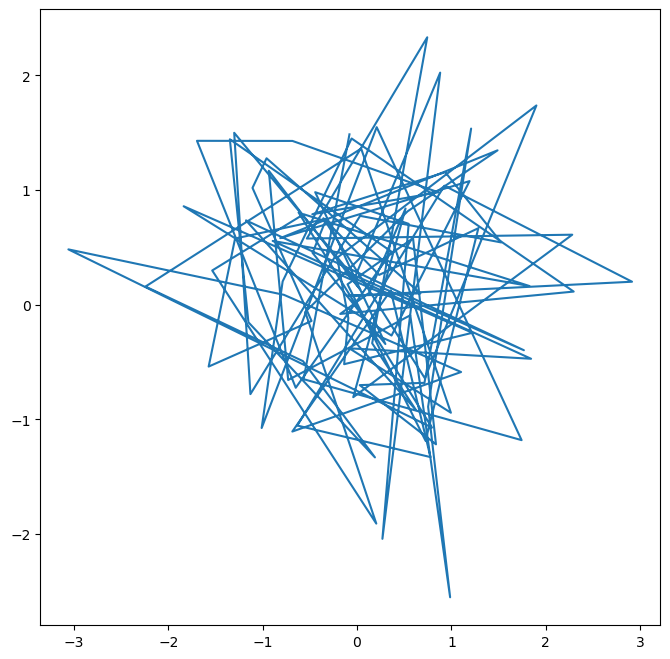

In [52]:
from matplotlib.pyplot import subplots
fig, ax = subplots(figsize = (8,8)) # subplots()는 길이가 2인 튜플을 반환 => fig와 ax에 풀어서 각각 넣어줌.
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.plot(x, y);

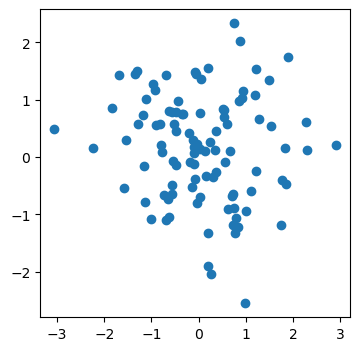

In [60]:
# 선 그래프가 default
# 원을 표시하는 추가 인자를 `ax.plot()`에 따로 제공해 산점도 생성
fig, ax = subplots(figsize = (4, 4))
ax.plot(x, y, 'o');

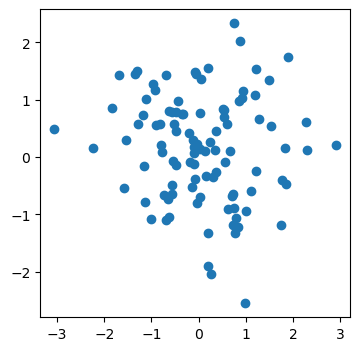

In [61]:
fig, ax = subplots(figsize = (4, 4))
ax.scatter(x, y, marker = 'o');

- 산점도 그리기
    - `ax.plot()`에서 'o'인자 입력
    - `ax.scatter()`에서 `marker = 'o'` 입력
- 그래프 레이블 설정
    - `ax.set_xlabel()` : xlabel 설정
    - `ax.set_ylabel()` : ylabel 설정
    - `ax.set_title()` : title 설정

Text(0.5, 1.0, 'Plot of X vs Y')

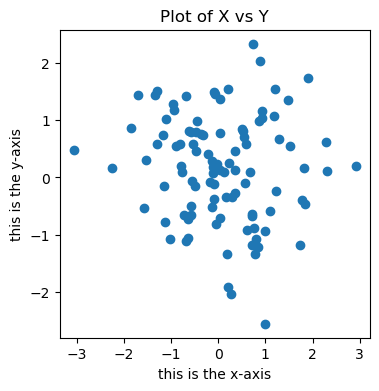

In [62]:
fig, ax = subplots(figsize = (4, 4))
ax.scatter(x, y, marker = 'o')
ax.set_xlabel('this is the x-axis')
ax.set_ylabel('this is the y-axis')
ax.set_title('Plot of X vs Y')

- `fig` 객체 : 그림 자체에 접근 가능한 객체
    - 객체 내부의 일부 측면을 변경하고 다시 그릴 수 있음

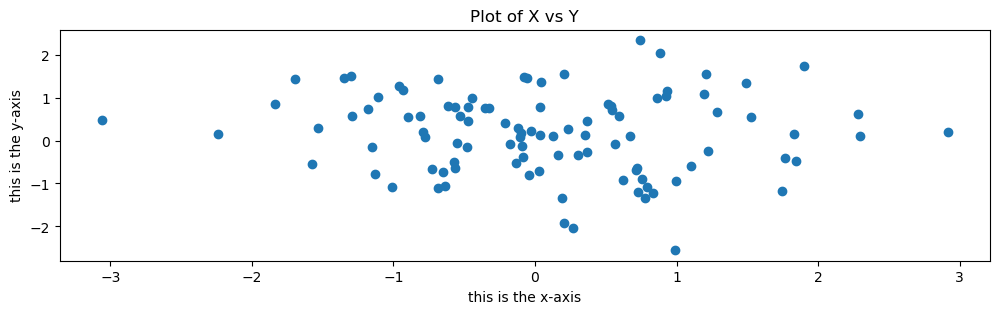

In [63]:
fig.set_size_inches(12, 3)
fig

- 하나의 그림에 여러 개의 그래프(plot) 생성
    - `subplots`에 추가 인자 전달
- 2x3 그래프(plot) 격자를 한 그림(figure) 안에 생성
- 그래프의 축들 사이에 관계가 있는 경우가 있음. (-> 모든 그래프가 공통의 `x`축을 가질 수 있음.)
    - `subplots()`에 키워드 인자 `sharex`에 `True` 전달 - 자동 처리

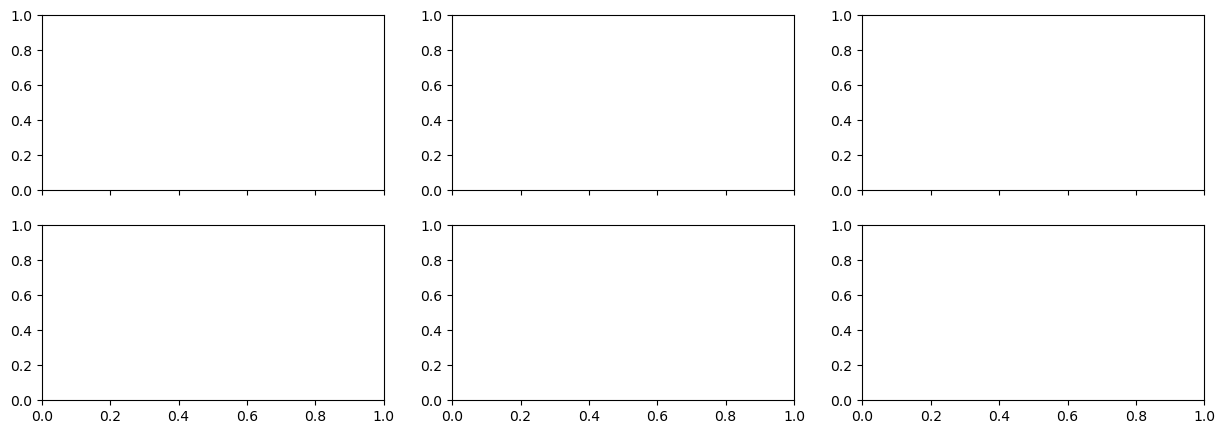

In [ ]:
fig, axes = subplots(nrows = 2,
                     ncols = 3,
                     figsize = (15, 5),
                     sharex=True) # x축 공유

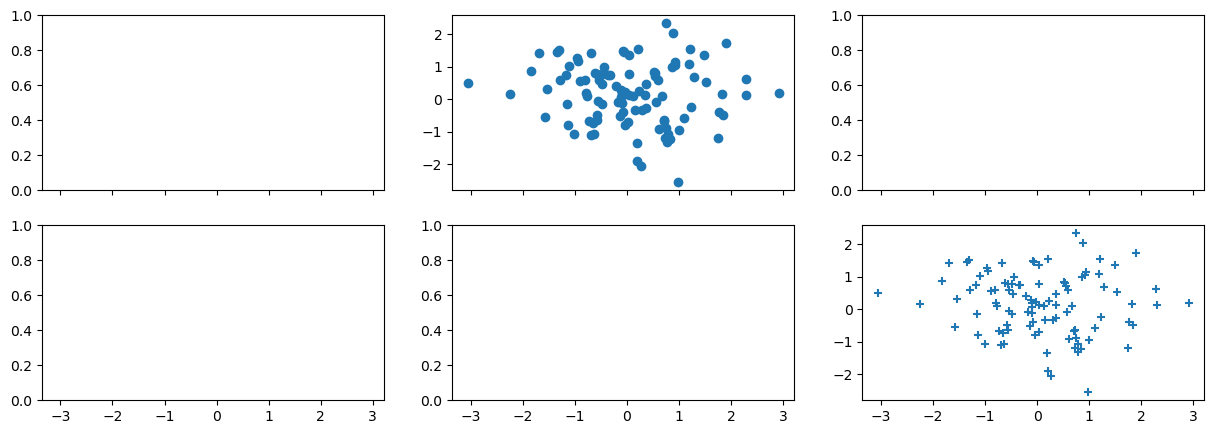

In [66]:
axes[0, 1].plot(x, y, 'o')
axes[1, 2].scatter(x, y, marker = '+')
fig

In [68]:
# fig 출력 - `savefig()` 메소드 사용 / dpi 인자 - 인치당 도트로 픽셀 단위의 그림 크기 결정
fig.savefig("figure/Figure.png", dpi = 400)
fig.savefig("figure/Figure.pdf", dpi = 200)

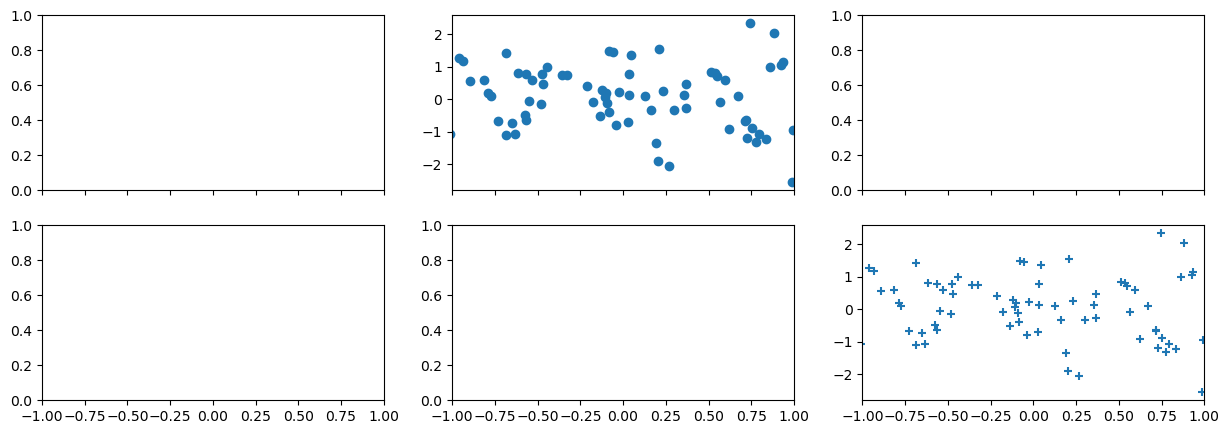

In [69]:
# fig 수정 => 단계적 갱신 (ex. x축의 범위 수정 -> 다시 저장, 화면에 표시)
axes[0, 1].set_xlim([-1, 1])
fig

- 등고선 그래프 그리기
    - `ax.contour()` - 지형도와 유사한 3차원 데이터 표현
    - 인자 : x값 벡터 / y값 벡터 / z - 각 (x,y)에 대응되는 원소로 이루어진 행렬

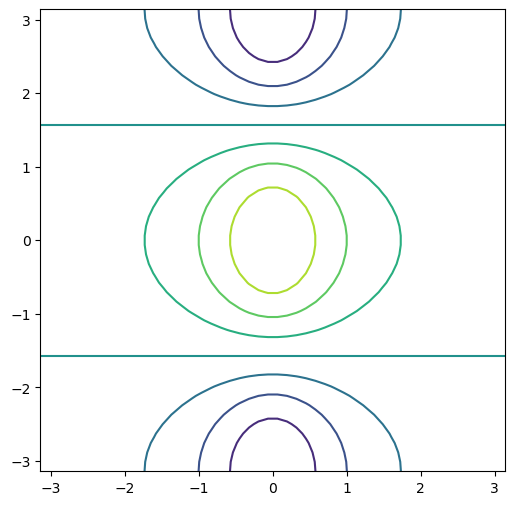

In [71]:
fig, ax = subplots(figsize = (6,6))
x = np.linspace(-np.pi, np.pi, 50)
y = x
f = np.multiply.outer(np.cos(y), 1 / (1 + x ** 2))
ax.contour(x, y, f);

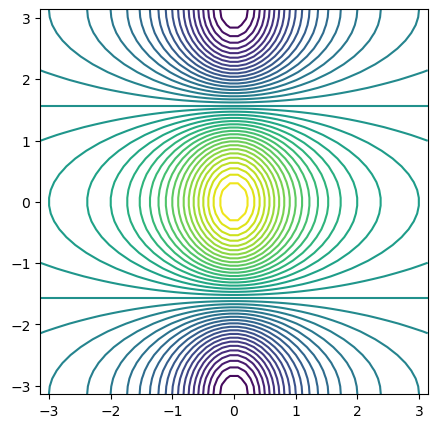

In [72]:
# 해상도 상승 -> levels 추가
fig, ax = subplots(figsize = (5,5))
ax.contour(x, y, f, levels = 45);

- 열지도(heatmap) 그리기
    - `ax.imshow()` - `z`값에 따라 색상이 달라지는 색상 코드 그래프 생성
    - `ax.contour()`와 유사
    - 일기 예보에서 온도 그래프를 그리는 데 사용

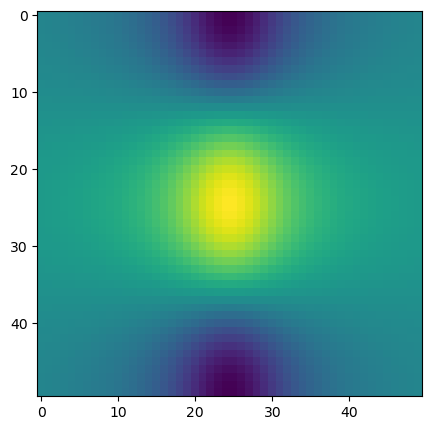

In [73]:
fig, ax = subplots(figsize = (5,5))
ax.imshow(f)

### 시퀀스와 슬라이스 표기법

- `np.linspace()` 함수 사용 => 시퀀스 생성
- `np.arange()` 함수 사용 => `step` 간격으로 배치된 숫자의 시퀀스 반환 (default : 1)
    - `stop` 값은 출력 x(슬라이스 표기법과 유사)

In [74]:
seq1 = np.linspace(0, 10, 11)
print(seq1)

seq2 = np.arange(0, 11)
print(seq2)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 0  1  2  3  4  5  6  7  8  9 10]


In [80]:
# 문자열의 네 번째에서 여섯 번째 항목 찾기
"hello world"[3:6], "hello world"[slice(3, 6)]

('lo ', 'lo ')

### 데이터 인덱싱

- 2차원 `numpy` 배열 생성

In [81]:
A = np.array(np.arange(16).reshape((4, 4)))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [89]:
A[[1, 3]][:, [0,2,3]]

array([[ 4,  6,  7],
       [12, 14, 15]])

In [82]:
A[1, 2]


6

#### 행, 열, 부분행렬 인덱싱

- 한 번에 여러 행 선택 -> 선택한 행이 무엇인지 리스트로 만들어 전달
    - `A[[1, 3]]` - 1행, 3행 추출
- 첫 번째와 세 번째 열 선택 -> 두 번째 인자로 리스트를 만들어 전달
    - `A[:, [0,2]]`

In [83]:
A[[1, 3]]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15]])

In [84]:
A[:,[0, 2]]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14]])

In [87]:
A[[1, 3], [0, 2]], np.array([A[1, 0], A[3, 2]])

(array([ 4, 14]), array([ 4, 14]))

In [91]:
A[1:4:2, 0:3:2] # 슬라이스 시퀀스의 세 번째 원소 : 간격의 크기

array([[ 4,  6],
       [12, 14]])

#### 논리값 인덱싱

- `numpy`에서 boolean 타입은 `True`, `False` 값을 가짐.
- 배열에 `==`연산 적용 시 원소별로 적용

In [93]:
keep_rows = np.zeros(A.shape[0], bool) # 논리값(boolean)으로 표현
keep_rows

array([False, False, False, False])

In [94]:
keep_rows[[1, 3]] = True
keep_rows

array([False,  True, False,  True])

In [96]:
np.all(keep_rows == np.array([0,1,0,1])) 
# np.all()은 배열의 모든 항목이 True인지 확인하는 함수
# np.any()는 어떤 항목이라도 True가 있는지 확인하는 함수

True

- 두 객체가 동등해도, 둘이 인덱싱하는 것은 다른 결과를 내보냄.
- `numpy`가 논리값(Boolean)과 정수를 다르게 처리함.

In [97]:
A[np.array([0,1,0,1])]

array([[0, 1, 2, 3],
       [4, 5, 6, 7],
       [0, 1, 2, 3],
       [4, 5, 6, 7]])

In [98]:
A[keep_rows]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15]])

### 데이터 로딩

- 데이터 세트는 다양한 유형의 데이터를 포함 + 행, 열과 관련된 이름들 존재 -> 데이터 프레임(data frame) 사용
- 데이터 프레임은 길이가 동등한 배열의 시퀀스로 생각
- `pandas` 라이브러리 활용

#### 데이터 세트 읽기

- 파일이 notebook 파일과 같은 위치에 있는지 확인
- 다른 위치에 있는 경우 `os.chdir()` 사용 => 디렉토리 변경
    - R에서 `setwd()`에 해당

In [103]:
from ISLP import load_data
Auto = load_data('Auto')
Auto = Auto.reset_index()
Auto.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [108]:
Auto['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
387     86
388     52
389     84
390     79
391     82
Name: horsepower, Length: 392, dtype: int64

In [109]:
np.unique(Auto['horsepower']) # 고유한 값들 확인

array([ 46,  48,  49,  52,  53,  54,  58,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98, 100, 102, 103, 105, 107, 108, 110,
       112, 113, 115, 116, 120, 122, 125, 129, 130, 132, 133, 135, 137,
       138, 139, 140, 142, 145, 148, 149, 150, 152, 153, 155, 158, 160,
       165, 167, 170, 175, 180, 190, 193, 198, 200, 208, 210, 215, 220,
       225, 230], dtype=int64)

- `Auto.data`를 이용해서 Auto 파일을 불러온 경우, `Auto['horsepower']`에 결측값이 포함되어 있고, `?`로 존재함.
- 이 문제를 해결하기 위해 `pd.read_csv()`에 `na_values`인자 입력
    - `pd.read_csv('Auto.data', na_values = ['?'], delim_whitespace = True)`

In [110]:
Auto['horsepower'].sum()

40952

#### 행과 열 선택

In [111]:
Auto_new = Auto.dropna()
Auto = Auto_new
Auto.columns

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

- 배열 : `[]` 메소드의 첫 번째 인자는 항상 행에 적용
- 데이터프레임 : 슬라이스를 `[]`메소드에 넘겨주면 '행'이 결정된 데이프레임이 생성
    - 논리값(Boolean) 배열 사용 => 행의 부분집합을 얻을 수 있음.
    - 문자열 리스트 사용 => 문자열에 대응되는 '열' 집합으로 구성된 데이터프레임 반환

In [112]:
Auto[:3]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1


In [114]:
idx_80 = Auto['year'] > 80
Auto[idx_80].head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
334,plymouth reliant,27.2,4,135.0,84,2490,15.7,81,1
335,buick skylark,26.6,4,151.0,84,2635,16.4,81,1
336,dodge aries wagon (sw),25.8,4,156.0,92,2620,14.4,81,1
337,chevrolet citation,23.5,6,173.0,110,2725,12.6,81,1
338,plymouth reliant,30.0,4,135.0,84,2385,12.9,81,1


In [115]:
Auto[['mpg', 'horsepower']]

,mpg,horsepower
0,18.0,130
1,15.0,165
2,18.0,150
3,16.0,150
4,17.0,140
...,...,...
387,27.0,86
388,44.0,52
389,32.0,84
390,28.0,79


In [117]:
Auto.index

RangeIndex(start=0, stop=392, step=1)

In [121]:
Auto_re = Auto.set_index('name') # name열을 index로 설정
display(Auto_re.head())
Auto_re.columns

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

- 인덱스가 `name`으로 설정됨. => 데이터프레임의 행에 `name`으로 접근 가능
    - `loc[]` 메서드 사용

In [122]:
rows = ['amc rebel sst', 'ford torino']
Auto_re.loc[rows]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [124]:
Auto_re.iloc[[3, 4]] # 인덱스 대신 integer기반 location 사용으로 추출

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [125]:
Auto_re.iloc[[3,4], [0,2,3]]

,mpg,displacement,horsepower
name,,,
amc rebel sst,16.0,304.0,150
ford torino,17.0,302.0,140


- 인덱스가 고유할 필요는 없음

In [127]:
Auto_re.loc['ford galaxie 500', ['mpg', 'origin']]

,mpg,origin
name,,
ford galaxie 500,15.0,1
ford galaxie 500,14.0,1
ford galaxie 500,14.0,1


#### 행과 열 선택에 대한 추가 설명

- `loc[]` 메소드 사용 - 논리값으로 데이터 선택 가능

In [129]:
idx_80 = Auto_re['year'] > 80
Auto_re.loc[idx_80, ['weight', 'origin']].head()

,weight,origin
name,,
plymouth reliant,2490,1
buick skylark,2635,1
dodge aries wagon (sw),2620,1
chevrolet citation,2725,1
plymouth reliant,2385,1


In [131]:
# 더 간결하게하기 위해 lmabda라는 익명함수 사용
Auto_re.loc[lambda df: df['year'] > 80, ['weight', 'origin']].head()

,weight,origin
name,,
plymouth reliant,2490,1
buick skylark,2635,1
dodge aries wagon (sw),2620,1
chevrolet citation,2725,1
plymouth reliant,2385,1


- `lambda` 함수 사용 - `'year'`가 80보다 큰 행 추출
- `lambda` 함수 사용 - `year` > 80이고 `mpg` > 30인 행 추출

In [133]:
Auto_re.loc[lambda df: (df['year'] > 80) & (df['mpg'] >30), ['weight', 'origin']].head()

,weight,origin
name,,
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3
datsun 210 mpg,1975,3


- `displacement`가 300미만인 `ford`와 `datsun` 차를 뽑는 경우

In [154]:
Auto_re.loc[(Auto_re['displacement'] < 300) & ((Auto_re.index.str.contains('ford') | (Auto_re.index.str.contains('datsun')))),['weight', 'origin']].head()

,weight,origin
name,,
ford maverick,2587,1
datsun pl510,2130,3
datsun pl510,2130,3
ford torino 500,3302,1
ford mustang,3139,1


In [155]:
Auto_re.loc[lambda df: (df['displacement'] < 300) & (df.index.str.contains('ford') | df.index.str.contains('datsun')), ['weight', 'origin']].head()

,weight,origin
name,,
ford maverick,2587,1
datsun pl510,2130,3
datsun pl510,2130,3
ford torino 500,3302,1
ford mustang,3139,1


- `loc[]` : 문자열과 논리값으로 선택
- `iloc[]` : 정수 기반 쿼리

### for 루프문

- 서로 다른 값들을 변화시키며 반복적으로 평가

In [156]:
total = 0
for value in [3,2,19]:
    total += value
print("Total is: {0}".format(total))

Total is: 24


In [157]:
total = 0
for value in [2, 3, 19]:
    for weight in [3, 2, 1]:
        total += value * weight
print("Total is: {0}".format(total))

Total is: 144


- `(value, weight)` 쌍의 합을 계산
    - 튜플들의 시퀀스를 순회하는 `zip()` 함수 사용 -> 수행


In [158]:
total = 0
for value, weight in zip([2,3,19],[0.2,0.3,0.5]):
    total += value * weight 
print(f"Weighted average is : {total}")

Weighted average is : 10.8


#### 문자열 서식

- 20% 항목이 결측된 열로 이루어진 데이터프레임 `D` 생성
- `D` 값들은 평균이 0이고 분산이 1인 정규분포로부터 생성
    - `rng,standard_normal()` 사용
- `rng.choice()` 사용 - 덮어씀.

In [ ]:
rng = np.random.default_rng(1)
A = rng.standard_normal((127, 5))
M = rng.choice([0, np.nan], p = [0.8, 0.2], size = A.shape) # 성공확률이 p[0]인 실험을 A.shape 회 반복 독립 시행
A += M 
D = pd.DataFrame(A, columns = ['food', 'bar', 'pickle', 'snack', 'popcorn'])
D[:3]

,food,bar,pickle,snack,popcorn
0,0.345584,0.821618,0.330437,-1.303157,NaN
1,NaN,-0.536953,0.581118,0.364572,0.294132
2,NaN,0.546713,NaN,-0.162910,-0.482119


In [162]:
for col in D.columns:
    template = 'Column "{0}" has {1:.2%} missing values'
    print(template.format(col, np.isnan(D[col]).mean()))

Column "food" has 16.54% missing values
Column "bar" has 25.98% missing values
Column "pickle" has 29.13% missing values
Column "snack" has 21.26% missing values
Column "popcorn" has 22.83% missing values


- 인자 + 서식 정보를 포함해서 출력 가능

### 9. 추가적인 그래픽과 수치 요약

- `ax.plot()`, `ax.scatterplot()` - 양적 변수 출력 가능
- `df.plot()` 형태로 호출해 `plot()` 메소드 사용 가능

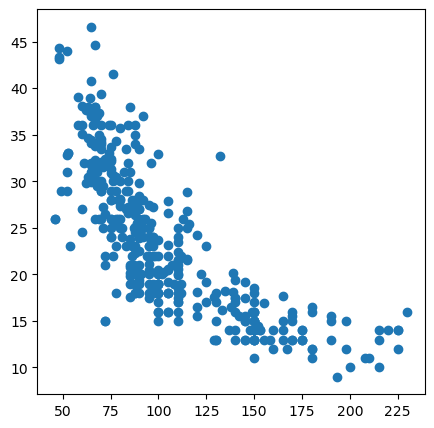

In [165]:
fig, ax = subplots(figsize = (5,5))
ax.plot(Auto['horsepower'], Auto['mpg'], 'o');

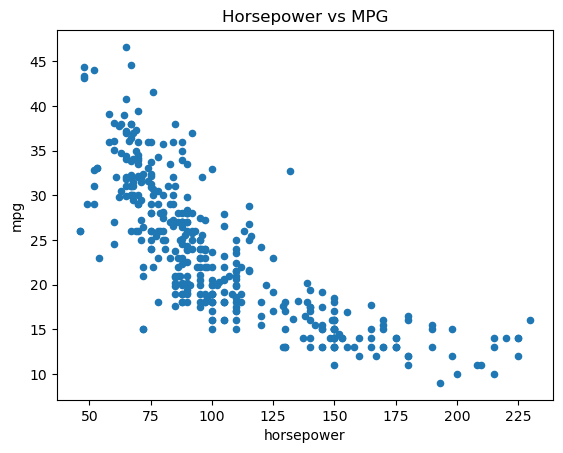

In [167]:
ax = Auto.plot.scatter('horsepower', 'mpg')
ax.set_title('Horsepower vs MPG');

In [168]:
fig = ax.figure 
fig.savefig('figure/horsepower_mpg.png')

- 여러 개의 축 객체 중 하나의 객체에 그림

<Axes: xlabel='horsepower'>

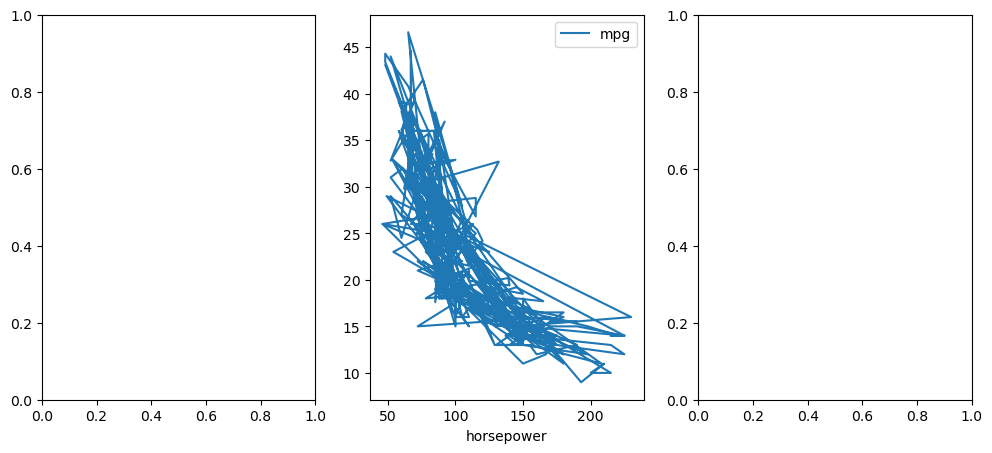

In [169]:
fig, axes = subplots(ncols = 3, figsize = (12, 5))
Auto.plot('horsepower', 'mpg', ax = axes[1])

In [170]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          392 non-null    object 
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    int64  
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   year          392 non-null    int64  
 8   origin        392 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


- `cylinders` - 양적 변수 -> 질적 변수
    - 가능한 값의 개수가 적으므로 질적 변수로 처리할 수 있음.
    - `cylinders`열을 범주형을 바꿀 수 있음.
- 질적 변수(범주형)을 `boxplot()`그림

In [171]:
Auto.cylinders = pd.Series(Auto.cylinders, dtype = 'category')
Auto.cylinders.dtype

CategoricalDtype(categories=[3, 4, 5, 6, 8], ordered=False, categories_dtype=int64)

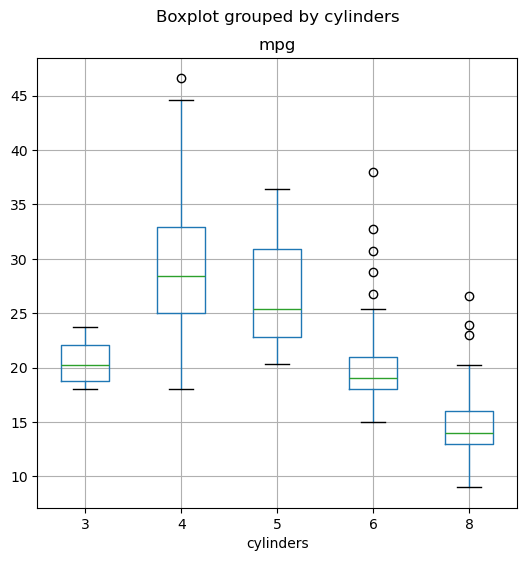

In [173]:
fig, ax = subplots(figsize = (6,6))
Auto.boxplot('mpg', by = 'cylinders', ax = ax);

- 히스토그램 그리기 - `hist()`
    - 막대 색상, 구간 개수 변경 - `color, bins` 인자 사용

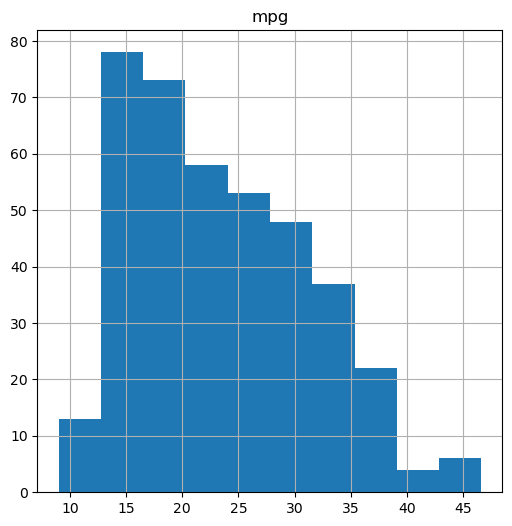

In [175]:
fig, ax = subplots(figsize = (6,6))
Auto.hist('mpg', ax = ax);

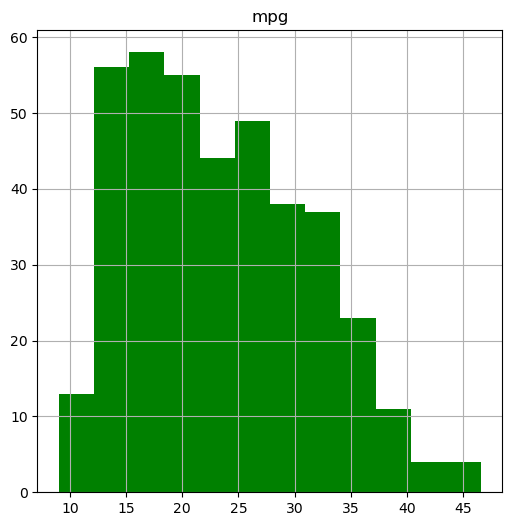

In [177]:
fig, ax = subplots(figsize = (6,6))
Auto.hist('mpg', color = 'green', bins = 12, ax = ax);

- 모든 열 사이의 쌍별 관계 시각화 - 산점도 행렬(scatterplot matrix)
    - `pd.plotting.scatter_matrix()` 함수 사용

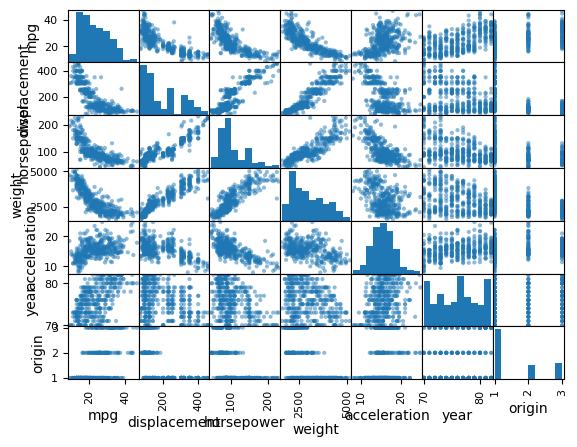

In [179]:
pd.plotting.scatter_matrix(Auto);

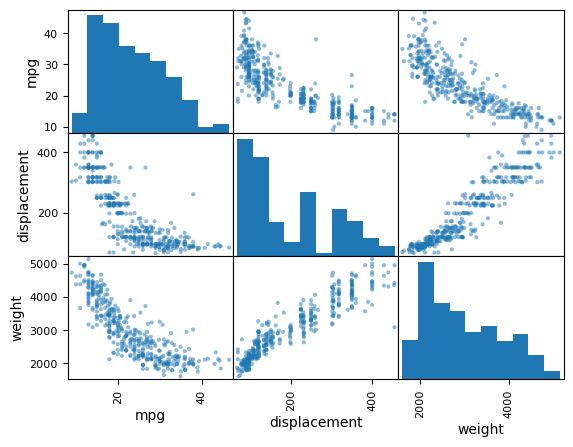

In [184]:
pd.plotting.scatter_matrix(Auto[['mpg','displacement','weight']]);

- 수치 요약 : `describe()` 메소드 사용